In [1]:
import os
import sys
import datetime as dt

sys.path.append(r"..")
import pyphenocam

import matplotlib as mpl
import matplotlib.pyplot as plt

import rasterio

In [2]:
base_dname = r"J:\Projects\NCCSC\phenocam\DerivedData\nationalelkrefuge"
site_name = "nationalelkrefuge"

In [3]:
phenosite = pyphenocam.dataaccess.get_site(site_name)

2016-05-29 12:30:00


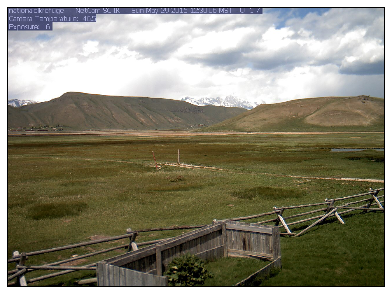

In [4]:
%matplotlib inline
landsat_fishnet_fname = os.path.join(base_dname, "ArcScene", "landsat_fishnet.bmp")
landsat_index_fname = os.path.join(base_dname, "ArcScene", "landsat_subset_index.bmp")

phenosite = pyphenocam.dataaccess.get_site(site_name)

closest_date = dt.datetime(2016, 5, 29, 12, 30)
print closest_date
sample_photo_fname = phenosite.get_closest_fname(closest_date)

local_fname = phenosite.get_local_image_fname(sample_photo_fname)
local_fname_ir = phenosite.get_local_image_fname(sample_photo_fname, IR=True)
sample_image = phenosite.get_local_image(sample_photo_fname)
sample_image_ir = phenosite.get_local_image(sample_photo_fname, IR=True)

fig, ax = plt.subplots(1, figsize=(12,5))
ax.imshow(sample_image)
pyphenocam.plotting.format_photo_axes(ax)

In [5]:
import numpy as np
import skimage.transform as trans

import skimage
index = skimage.io.imread(landsat_index_fname)
sky = (np.sum(index, axis=2) == 765)
#resize sky to match our sample_image
sky = trans.resize(sky, (sample_image.shape[0], sample_image.shape[1]), preserve_range=True, order=0).astype(np.bool)

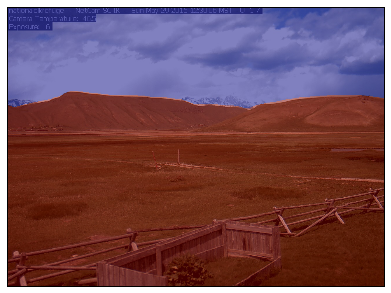

In [6]:
fig, ax = plt.subplots(1, figsize=(12,5))
ax.imshow(sample_image)
ax.imshow(sky, alpha=0.5, cmap=mpl.cm.jet_r)
pyphenocam.plotting.format_photo_axes(ax)

In [7]:
def get_bluesky(sample_image, sky):
    blue = sample_image[:,:,2] / np.sum(sample_image, axis=2).astype(np.float32)
    pcnt_bluesky = 1 - np.mean(sample_image[sky][:, 2])/255.
    return pcnt_bluesky

2016-05-29 12:30:00
0.142305231826


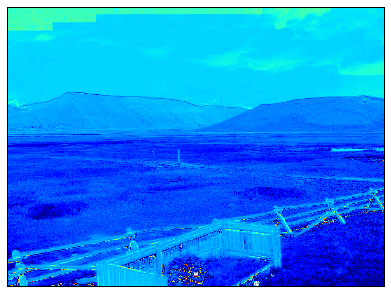

In [8]:
closest_date = dt.datetime(2016, 5, 29, 12, 30)
print closest_date
sample_photo_fname = phenosite.get_closest_fname(closest_date)

local_fname = phenosite.get_local_image_fname(sample_photo_fname)
local_fname_ir = phenosite.get_local_image_fname(sample_photo_fname, IR=True)
sample_image = phenosite.get_local_image(sample_photo_fname)
sample_image_ir = phenosite.get_local_image(sample_photo_fname, IR=True)

fig, ax = plt.subplots(1, figsize=(12,5))
# ax.imshow(sample_image)
blue = sample_image[:,:,2] / np.sum(sample_image, axis=2).astype(np.float32)
ax.imshow(blue)
pyphenocam.plotting.format_photo_axes(ax)
print get_bluesky(sample_image, sky)

2015-09-01 12:30:00
0.396863235732


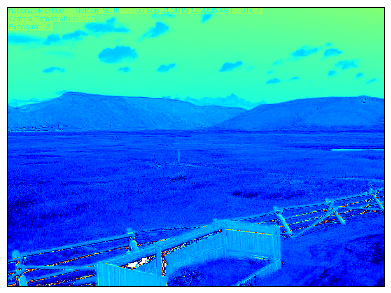

In [9]:
closest_date = dt.datetime(2015, 9, 1, 12, 30)
print closest_date
sample_photo_fname = phenosite.get_closest_fname(closest_date)

local_fname = phenosite.get_local_image_fname(sample_photo_fname)
local_fname_ir = phenosite.get_local_image_fname(sample_photo_fname, IR=True)
sample_image = phenosite.get_local_image(sample_photo_fname)
sample_image_ir = phenosite.get_local_image(sample_photo_fname, IR=True)

fig, ax = plt.subplots(1, figsize=(12,5))
# ax.imshow(sample_image)
blue = sample_image[:,:,2] / np.sum(sample_image, axis=2).astype(np.float32)
ax.imshow(blue)
pyphenocam.plotting.format_photo_axes(ax)

print get_bluesky(sample_image, sky)

2015-10-01 12:30:00
0.23062210802


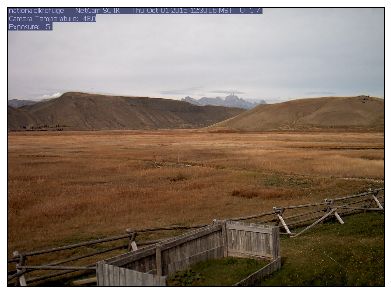

In [14]:
closest_date = dt.datetime(2015, 10, 1, 12, 30)
print closest_date
sample_photo_fname = phenosite.get_closest_fname(closest_date)

local_fname = phenosite.get_local_image_fname(sample_photo_fname)
local_fname_ir = phenosite.get_local_image_fname(sample_photo_fname, IR=True)
sample_image = phenosite.get_local_image(sample_photo_fname)
sample_image_ir = phenosite.get_local_image(sample_photo_fname, IR=True)

fig, ax = plt.subplots(1, figsize=(12,5))
ax.imshow(sample_image)
pyphenocam.plotting.format_photo_axes(ax)

print get_bluesky(sample_image, sky)

In [15]:
def gcc(img):
    gcc = img[:,:, 0].astype(np.float32) / np.sum(img, axis=2)
    return np.ma.masked_where(sky, gcc)

In [16]:
def bottom_align_cb(fig, ax, im, height=0.02, shrink=0.01, yoffset=0.08):
    b = ax.get_position()
    b.x0, b.width
    cax = fig.add_axes([b.x0 + shrink, b.y0 + yoffset, 
                            b.width - (shrink * 2), height])
    fig.colorbar(im, cax=cax, orientation='horizontal')
    return cax

2016-06-01 12:30:00


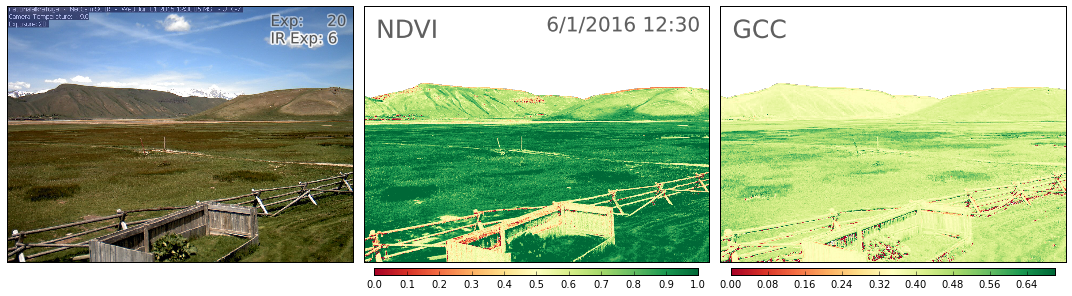

In [22]:
closest_date = dt.datetime(2016, 6, 1, 12, 30)
print closest_date
sample_photo_fname = phenosite.get_closest_fname(closest_date)

local_fname = phenosite.get_local_image_fname(sample_photo_fname)
local_fname_ir = phenosite.get_local_image_fname(sample_photo_fname, IR=True)
sample_image = phenosite.get_local_image(sample_photo_fname)
sample_image_ir = phenosite.get_local_image(sample_photo_fname, IR=True)

exposure = pyphenocam.headerextraction.get_exposure(local_fname)
exposure_ir = pyphenocam.headerextraction.get_exposure(local_fname_ir)

corrected_ndvi = pyphenocam.imageprocessing._get_corrected_ndvi(local_fname, 
                                                                local_fname_ir, 
                                                                float(exposure), 
                                                                float(exposure_ir))
corrected_ndvi_m = np.ma.masked_where(sky, corrected_ndvi)

fig, (ax_photo, ax_ndvi, ax_gcc) = plt.subplots(1, 3, figsize=(15,5))
pyphenocam.plotting.format_photo_axes(ax_photo)
pyphenocam.plotting.format_photo_axes(ax_ndvi)
pyphenocam.plotting.format_photo_axes(ax_gcc)

pyphenocam.plotting.add_inner_title(ax_ndvi, "NDVI", 
                                    2, dict(size=25, alpha=0.5))
pyphenocam.plotting.add_inner_title(ax_gcc, "GCC", 
                                    2, dict(size=25, alpha=0.5))

exp_title = pyphenocam.plotting.add_inner_title(ax_photo, "Exp:     {}\nIR Exp: {}".format(exposure, exposure_ir), 
                                    1, dict(size=15, alpha=0.5))
date_title = pyphenocam.plotting.add_inner_title(ax_ndvi, "{dt.month}/{dt.day}/{dt.year} {dt.hour}:{dt.minute}".format(dt=closest_date), 
                                    1, dict(size=20, alpha=0.5))

im_photo = ax_photo.imshow(sample_image)
im_ndvi = ax_ndvi.imshow(corrected_ndvi_m, vmin=0, vmax=1.0, cmap=mpl.cm.RdYlGn)
im_gcc = ax_gcc.imshow(gcc(sample_image), vmin=0, vmax=0.7, cmap=mpl.cm.RdYlGn)

plt.tight_layout()
bottom_align_cb(fig, ax_ndvi, im_ndvi)
bottom_align_cb(fig, ax_gcc, im_gcc)



2

	1 	9 . . 10 . . 11 . . 12 . . 13 . . 14 . . 15 . . 
	2 	9 . . 10 . . 11 . . 12 . . 13 . . 14 . . 15 . . 
	3 	9 . . 10 . . 11 . . 12 . . 13 . . 14 . . 15 . . 
	4 	9 . . 10 . . 11 . . 12 . . 13 . . 14 . . 15 . . 
	5 	9 . . 10 . . 11 . . 12 . . 13 . . 14 . . 15 . . 
	6 	9 . . 10 . . 11 . . 12 . . 13 . . 14 . . 15 . . 
	7 	9 . . 10 . . 11 . . 12 . . 13 . . 14 . . 15 . . 
	8 	9 . . 10 . . 11 . . 12 . . 13 . . 14 . . 15 . . 
	9 	9 . . 10 . . 11 . . 12 . . 13 . . 14 . . 15 . . 
	10 	9 . . 10 . . 11 . . 12 . . 13 . . 14 . . 15 . . 
	11 	9 . . 10 . . 11 . . 12 . . 13 . . 14 . . 15 . . 
	12 	9 . . 10 . . 11 . . 12 . . 13 . . 14 . . 15 . . 
	13 	9 . . 10 . . 11 . . 12 . . 13 . . 14 . . 15 . . 
	14 	9 . . 10 . . 11 . . 12 . . 13 . . 14 . . 15 . . 
	15 	9 . . 10 . . 11 . . 12 . . 13 . . 14 . . 15 . . 
	16 	9 . . 10 . . 11 . . 12 . . 13 . . 14 . . 15 . . 
	17 	9 . . 10 . . 11 . . 12 . . 13 . . 14 . . 15 . . 
	18 	9 . . 10 . . 11 . . 12 . . 13 . . 14 . . 15 . . 
	19 	9 . . 10 . . 11 . . 12 . . 13

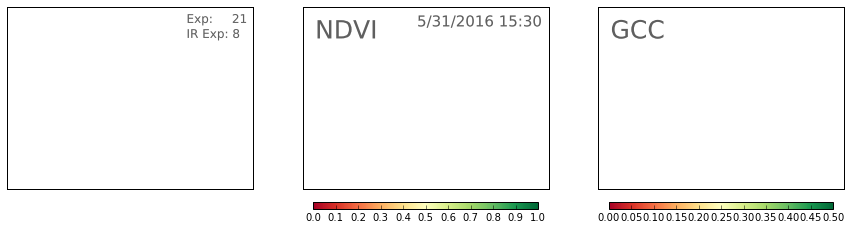

In [18]:
# This example uses a MovieWriter directly to grab individual frames and
# write them to a file. This avoids any event loop integration, but has
# the advantage of working with even the Agg backend. This is not recommended
# for use in an interactive setting.
# -*- noplot -*-

import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as manimation

FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='test', artist='Matplotlib',
                comment='test2')
writer = FFMpegWriter(fps=10, bitrate=5000, metadata=metadata)

fig, (ax_photo, ax_ndvi, ax_gcc) = plt.subplots(1, 3, figsize=(15,5))
pyphenocam.plotting.format_photo_axes(ax_photo)
pyphenocam.plotting.format_photo_axes(ax_ndvi)
pyphenocam.plotting.format_photo_axes(ax_gcc)

pyphenocam.plotting.add_inner_title(ax_ndvi, "NDVI", 
                                    2, dict(size=25, alpha=0.5))
pyphenocam.plotting.add_inner_title(ax_gcc, "GCC", 
                                    2, dict(size=25, alpha=0.5))

exp_title = pyphenocam.plotting.add_inner_title(ax_photo, "Exp:     {}\nIR Exp: {}".format(exposure, exposure_ir), 
                                    1, dict(size=12, alpha=0.5))
date_title = pyphenocam.plotting.add_inner_title(ax_ndvi, "{dt.month}/{dt.day}/{dt.year} {dt.hour}:{dt.minute}".format(dt=closest_date), 
                                    1, dict(size=15, alpha=0.5))

bottom_align_cb(fig, ax_ndvi, im_ndvi)
bottom_align_cb(fig, ax_gcc, im_gcc)

with writer.saving(fig, os.path.join(base_dname, 'natelk.mp4'), 100):
    for month in range(2, 6):
        print month
        for day in range(1, 32):
            print ""
            print '\t', day, '\t',
            for hour in range(9, 16):
                print hour,
                for minute in [0, 30]:
                    print ".",
                    try:
                        closest_date = dt.datetime(2016, month, day, hour, minute)
                        sample_photo_fname = phenosite.get_closest_fname(closest_date)

                        local_fname = phenosite.get_local_image_fname(sample_photo_fname)
                        local_fname_ir = phenosite.get_local_image_fname(sample_photo_fname, IR=True)
                        sample_image = phenosite.get_local_image(sample_photo_fname)
                        sample_image_ir = phenosite.get_local_image(sample_photo_fname, IR=True)

                        exposure = pyphenocam.headerextraction.get_exposure(local_fname)
                        exposure_ir = pyphenocam.headerextraction.get_exposure(local_fname_ir)
                        corrected_ndvi = pyphenocam.imageprocessing._get_corrected_ndvi(local_fname, 
                                                                                        local_fname_ir, 
                                                                                        float(exposure), 
                                                                                        float(exposure_ir))
                        corrected_ndvi_m = np.ma.masked_where(sky, corrected_ndvi)

                        im_photo = ax_photo.imshow(sample_image)
                        im_ndvi = ax_ndvi.imshow(corrected_ndvi_m, vmin=0, vmax=1., cmap=mpl.cm.RdYlGn)
                        im_gcc = ax_gcc.imshow(gcc(sample_image), vmin=0, vmax=0.5, cmap=mpl.cm.RdYlGn)

                        date_title.txt.set_text("{dt.month}/{dt.day}/{dt.year} {dt.hour:02d}:{dt.minute:02d}".format(dt=closest_date))
                        exp_title.txt.set_text("Exp:     {}\nIR Exp: {}".format(exposure, exposure_ir))
                        
                        writer.grab_frame()
                        im_photo.remove()
                        im_ndvi.remove()
                        im_gcc.remove()
                        
                        del im_photo
                        del im_ndvi
                        del im_gcc
                        
                        del sample_image
                        del corrected_ndvi
                        del corrected_ndvi_m
                        del sample_image_ir
                    except Exception, e:
                        print "except:", str(e)
                        try:
                            del im
                            del im2
                            del sample_image
                            del corrected_ndvi
                            del corrected_ndvi_m
                            del sample_image_ir
                        except:
                            pass


In [ ]:
# This example uses a MovieWriter directly to grab individual frames and
# write them to a file. This avoids any event loop integration, but has
# the advantage of working with even the Agg backend. This is not recommended
# for use in an interactive setting.
# -*- noplot -*-

import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as manimation

FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='test', artist='Matplotlib',
                comment='test2')
writer = FFMpegWriter(fps=2, bitrate=5000, metadata=metadata)

fig, (ax_photo, ax_ndvi, ax_gcc) = plt.subplots(1, 3, figsize=(15,5))
pyphenocam.plotting.format_photo_axes(ax_photo)
pyphenocam.plotting.format_photo_axes(ax_ndvi)
pyphenocam.plotting.format_photo_axes(ax_gcc)

pyphenocam.plotting.add_inner_title(ax_ndvi, "NDVI", 
                                    2, dict(size=25, alpha=0.5))
pyphenocam.plotting.add_inner_title(ax_gcc, "GCC", 
                                    2, dict(size=25, alpha=0.5))

exp_title = pyphenocam.plotting.add_inner_title(ax_photo, "Exp:     {}\nIR Exp: {}".format(exposure, exposure_ir), 
                                    1, dict(size=15, alpha=0.5))
date_title = pyphenocam.plotting.add_inner_title(ax_ndvi, "{dt.month}/{dt.day}/{dt.year} {dt.hour}:{dt.minute}".format(dt=closest_date), 
                                    1, dict(size=20, alpha=0.5))


with writer.saving(fig, r'C:\temp_colin\downloads\Python_exploration\natelk.mp4', 100):
    for month in range(5, 6):
        print month
        for day in range(1, 4):
            print ""
            print '\t', day, '\t',
            for hour in range(9, 15):
                print hour,
                for minute in [0, 30]:
                    print ".",
                    try:
                        closest_date = dt.datetime(2016, month, day, hour, minute)
                        sample_photo_fname = phenosite.get_closest_fname(closest_date)

                        local_fname = phenosite.get_local_image_fname(sample_photo_fname)
                        local_fname_ir = phenosite.get_local_image_fname(sample_photo_fname, IR=True)
                        sample_image = phenosite.get_local_image(sample_photo_fname)
                        sample_image_ir = phenosite.get_local_image(sample_photo_fname, IR=True)

                        exposure = pyphenocam.headerextraction.get_exposure(local_fname)
                        exposure_ir = pyphenocam.headerextraction.get_exposure(local_fname_ir)
                        corrected_ndvi = pyphenocam.imageprocessing._get_corrected_ndvi(local_fname, 
                                                                                        local_fname_ir, 
                                                                                        float(exposure), 
                                                                                        float(exposure_ir))
                        corrected_ndvi_m = np.ma.masked_where(sky, corrected_ndvi)

                        im_photo = ax_photo.imshow(sample_image)
                        im_ndvi = ax_ndvi.imshow(corrected_ndvi_m, vmin=0, vmax=1., cmap=mpl.cm.RdYlGn)
                        im_gcc = ax_gcc.imshow(gcc(sample_image), vmin=0, vmax=0.5, cmap=mpl.cm.RdYlGn)
                        plt.tight_layout()

                       
                        
                        
                        del im
                        del im2
                        del sample_image
                        del corrected_ndvi
                        del corrected_ndvi_m
                        del sample_image_ir
                    except:
                        try:
                            del im
                            del im2
                            del sample_image
                            del corrected_ndvi
                            del corrected_ndvi_m
                            del sample_image_ir
                        except:
                            pass